In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

%matplotlib inline

In [21]:
N_voltages  = 2000
step_size   = 1e-10
time        = step_size*np.arange(1,N_voltages)*1e9

data        = {target_electrode : pd.read_csv(f"data/Nx=9_Ny=9_Nz=1_Ne=8_{target_electrode}.csv") for target_electrode in range(1,8)}
voltages    = data[1]['E0'].values

In [32]:
data[5]

,E0,E1,E2,E3,E4,E5,E6,G,Eq_Jumps,Jumps,Current,Error
0,0.062986,0.015463,0.006732,0.014897,0.004537,0.0,0.006222,0.002206,0.0,2.748,0.0,0.0
1,0.066256,0.016132,0.007213,0.015298,0.004738,0.0,0.006558,0.002414,0.0,2.812,0.0,0.0
2,0.065340,0.015812,0.007086,0.015178,0.004844,0.0,0.006631,0.002326,0.0,2.758,0.0,0.0
3,0.064841,0.015593,0.007070,0.014966,0.004814,0.0,0.006479,0.002235,0.0,2.664,0.0,0.0
4,0.064126,0.015448,0.006944,0.014386,0.005044,0.0,0.006435,0.002193,0.0,2.732,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.066019,0.016600,0.006972,0.015021,0.004946,0.0,0.006846,0.002597,0.0,2.810,0.0,0.0
1995,0.065428,0.016139,0.006879,0.015035,0.004838,0.0,0.006747,0.002475,0.0,2.712,0.0,0.0
1996,0.060538,0.014982,0.006469,0.014034,0.004558,0.0,0.006065,0.002278,0.0,2.638,0.0,0.0
1997,0.064116,0.016202,0.006861,0.014722,0.004595,0.0,0.006504,0.002393,0.0,2.710,0.0,0.0


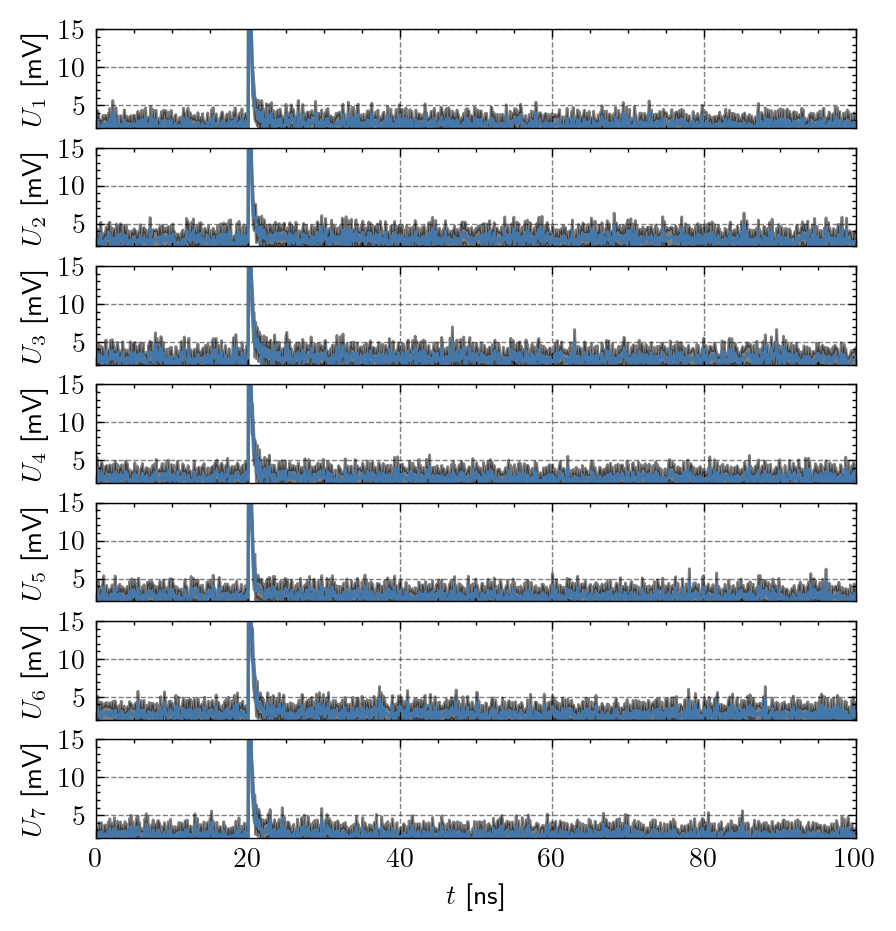

In [5]:
with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*1.4)
    fig.set_figheight(fig.get_figheight()*2.0)

    for i, df in data.items():

        ax      = fig.add_subplot(7,1,i)
        values  = df['Current']*1000
        error   = df['Error']*1000

        ax.plot(time, values)#, label='$N_{NP} ='+f' {N}$')
        ax.fill_between(x=time, y1=values-error, y2=values+error, color='black', alpha=0.5)
        ax.set_ylabel(f"$U_{i}$ [mV]")
        ax.set_ylim(2,15)
        ax.set_xlim(0,100)
        
        if i != 7:
            ax.set_xticklabels("")

    ax.set_xlabel("$t$ [ns]")

    # fig.savefig("plots/constant_string_low_T.svg", transparent=True)